https://harikabonthu96.medium.com/single-link-clustering-clearly-explained-90dff58db5cb

https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist

In [2]:
a = np.random.random_sample(size = 5)
b = np.random.random_sample(size = 5)

In [3]:
point = ['P1','P2','P3','P4','P5']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')

In [4]:
data

a     b
Point            
P1     0.11  0.17
P2     0.89  0.09
P3     0.40  0.11
P4     0.88  0.29
P5     0.37  0.71

Step1: Visualize the data using a Scatter Plot

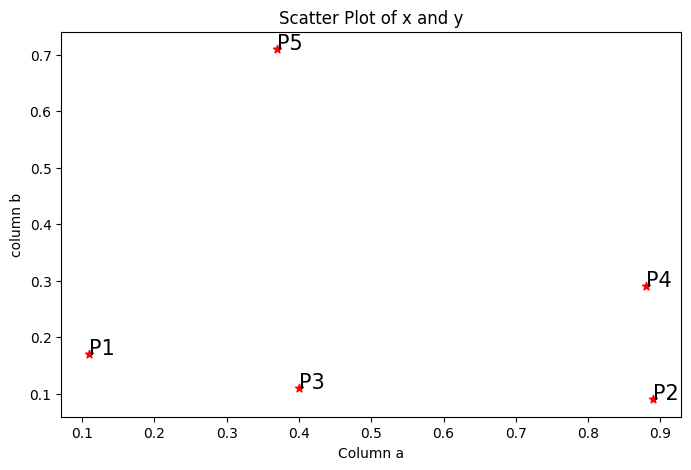

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='*')
plt.xlabel('Column a')
plt.ylabel('column b')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

Step2: Calculating the distance matrix in Euclidean method using pdist

In [8]:
dist = pd.DataFrame(squareform(pdist(data[['a', 'b']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist

P1        P2        P3        P4        P5
P1  0.000000  0.784092  0.296142  0.779295  0.599333
P2  0.784092  0.000000  0.490408  0.200250  0.809197
P3  0.296142  0.490408  0.000000  0.512640  0.600750
P4  0.779295  0.200250  0.512640  0.000000  0.660681
P5  0.599333  0.809197  0.600750  0.660681  0.000000

Step 4: Re-compute the distance matrix after forming a cluster

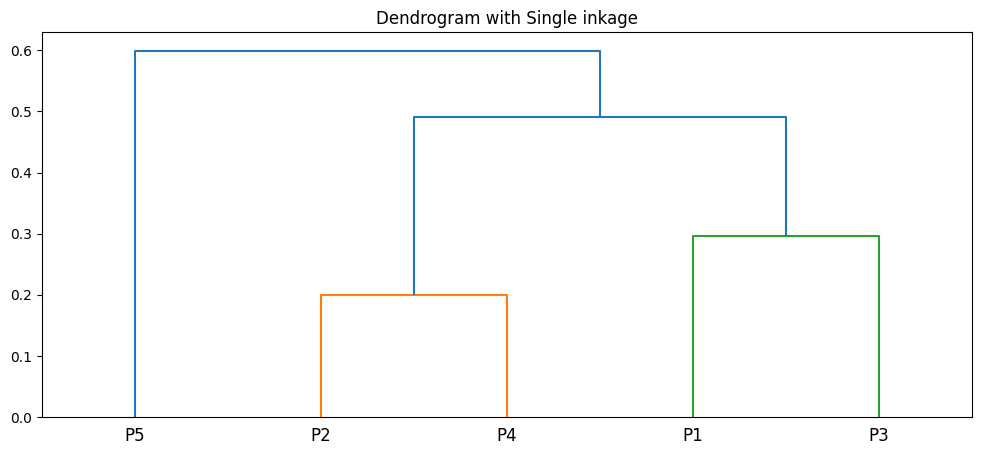

In [9]:
plt.figure(figsize=(12,5))
plt.title("Dendrogram with Single inkage")
dend = shc.dendrogram(shc.linkage(data[['a', 'b']], method='single'), labels=data.index)